In [1]:
# Import packages
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('ml_data/credit_card_fraud_dataset.csv')
# Shuffle the data
df = df.sample(frac = 1, random_state=42)

In [3]:
# Min-Max Scale amount column using pandas
# Initialise scaer
scaler = MinMaxScaler()
df["Amount"] = pd.DataFrame(scaler.fit_transform(df[["Amount"]]), columns=["Amount"], index=df.index)

In [4]:
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
75721,75722,2024-08-18 01:11:35.918051,0.806240,503,refund,Phoenix,1
80184,80185,2024-06-09 07:44:35.939541,0.603707,378,purchase,San Diego,0
19864,19865,2024-06-10 08:55:35.558368,0.032562,406,refund,San Diego,0
76699,76700,2023-11-12 20:38:35.922125,0.509606,525,refund,Chicago,0
92991,92992,2024-04-13 02:23:35.997572,0.658367,177,purchase,Chicago,0


In [5]:
# Drop Unnecessary columns
df = df.drop(columns=['TransactionDate','TransactionID', 'MerchantID','Location', 'TransactionType', 'MerchantID'])

In [6]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(df.drop('IsFraud', axis=1),df['IsFraud'], test_size=0.25, random_state=42)

In [7]:
pen_var = 'l2'
tol_var = 1e-4
dual_var = False
c_var = 0.02
fit_intercept_var = False
intercept_scaling_var = 1
class_weight_var = 'balanced'
random_state_var = 42
sol_var = 'sag'
max_iter_var = 10000
multi_class_var = 'auto'
verbose_var = 0
warm_start_var = False
n_jobs_var = None
l1_ratio_var = None


# Train the model
LogReg = LogisticRegression(penalty = pen_var, 
                            tol = tol_var,
                            dual=dual_var,
                            C = c_var,
                            fit_intercept = fit_intercept_var, 
                            intercept_scaling = intercept_scaling_var,
                            class_weight = class_weight_var,
                            random_state= random_state_var,
                            solver=sol_var,
                            max_iter=max_iter_var,
                            multi_class= multi_class_var,
                            verbose=verbose_var,
                            warm_start=warm_start_var,
                            n_jobs=n_jobs_var,
                            l1_ratio=l1_ratio_var
                             )
LogReg.fit(X_train, y_train)

/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.02, class_weight='balanced', fit_intercept=False,
                   max_iter=10000, multi_class='auto', random_state=42,
                   solver='sag')

In [8]:
# Scoring
train_score = LogReg.score(X_train, y_train)
print(f"Training Accuracy: {round(train_score*100)}%")
test_score = LogReg.score(X_test, y_test)
print(f"Testing Accuracy: {round(test_score*100)}%")

Training Accuracy: 1%
Testing Accuracy: 1%


In [9]:
# Predictions for X_test
y_pred = LogReg.predict(X_test)
f1_score(y_true=y_test, y_pred=y_pred, average='weighted')

0.00016055500495540137

In [10]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_true=y_test, y_pred=y_pred, average='weighted')

/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


8.099999999999999e-05

In [11]:
# Recall Score
from sklearn.metrics import recall_score
recall_score(y_true=y_test, y_pred=y_pred, average='weighted')

0.009

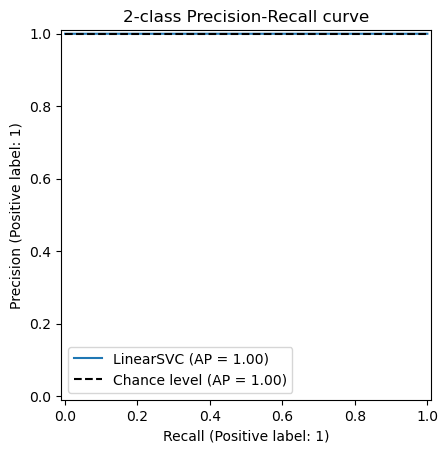

In [12]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    LogReg, X_test, y_pred, name="LinearSVC", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

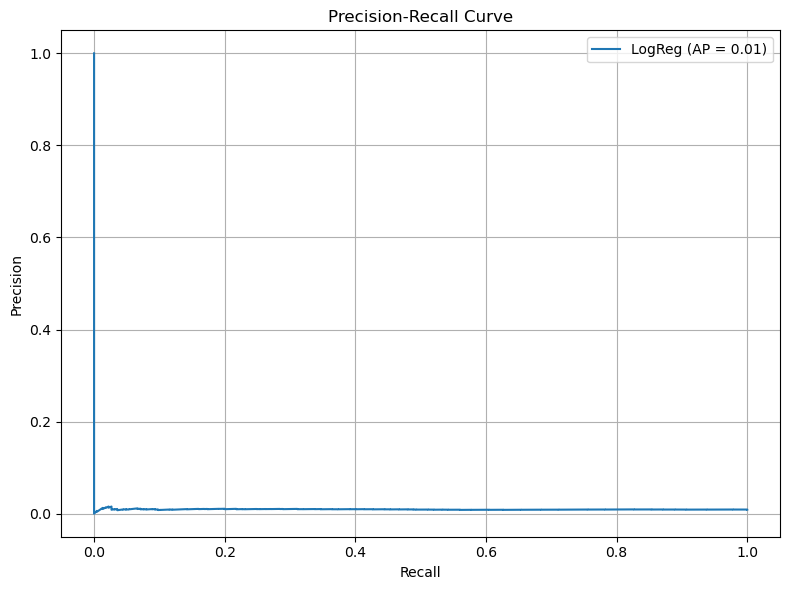

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# If y_pred is the predicted *labels*, use predict_proba instead:
# y_scores = LogReg.predict_proba(X_test)[:, 1]
# Otherwise, use y_pred directly if it's already probabilities:
y_scores =  LogReg.predict_proba(X_test)[:, 1]

# Assuming you have the true labels
# (replace y_test with your actual test labels)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'LogReg (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
def model_assessment(X_train,y_train,X_test,y_test, intercept_values, verbose=True):
    """
    Assess logistic regression performance with different intercept values.
    
    Parameters:
    -----------
    X_train, y_train : Training data
    X_test, y_test : Test data  
    intercept_values : List of intercept values to test
    verbose : Whether to print detailed results
    
    Returns:
    --------
    results : List of dictionaries with performance metrics
    """

    results = []

    # Logistic Regression model

    for i, intercept_val in enumerate(intercept_values):

        # Add intercept column with specified value:

        X_train_with_intercept = np.column_stack([np.full(X_train.shape[0], intercept_val), X_train])
        X_test_with_intercept = np.column_stack([np.full(X_test.shape[0], intercept_val), X_test])

        # Model parameters

        pen_var = 'l2'
        tol_var = 1e-4
        dual_var = False
        c_var = 1.0
        fit_intercept_var = False # We're adding the intercept manually
        intercept_scaling_var = 1
        class_weight_var = 'balanced'
        random_state_var = 42
        sol_var = 'sag'
        max_iter_var = 100000
        multi_class_var = 'auto'
        verbose_var = 0
        warm_start_var = False
        n_jobs_var = None
        l1_ratio_var = None


        # Train the model
        LogReg = LogisticRegression(penalty = pen_var, 
                                    tol = tol_var,
                                    dual=dual_var,
                                    C = c_var,
                                    fit_intercept = fit_intercept_var, 
                                    intercept_scaling = intercept_scaling_var,
                                    class_weight = class_weight_var,
                                    random_state= random_state_var,
                                    solver=sol_var,
                                    max_iter=max_iter_var,
                                    multi_class= multi_class_var,
                                    verbose=verbose_var,
                                    warm_start=warm_start_var,
                                    n_jobs=n_jobs_var,
                                    l1_ratio=l1_ratio_var
                                    )
        LogReg.fit(X_train_with_intercept, y_train)

        # Get probabilities for log loss
        y_train_proba = LogReg.predict_proba(X_train_with_intercept)
        y_test_proba = LogReg.predict_proba(X_test_with_intercept)

        if verbose:
            print(f"Learned Coefficients: {LogReg.coef_[0]}")
            print(f"Effective Intercept: {LogReg.coef_[0][0] * intercept_val}")

         #Calculate accuracies correctly
        train_accuracy = LogReg.score(X_train_with_intercept, y_train)
        test_accuracy = LogReg.score(X_test_with_intercept, y_test)  
        
        if verbose:
            print(f"Training Accuracy: {round(train_accuracy*100)}%")
            print(f"Testing Accuracy: {round(test_accuracy*100)}%")

       # Predictions and f-1 score
        y_pred = LogReg.predict(X_test_with_intercept)
        f1score = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
        
        if verbose:
            print(f"F-1 Score: {f1score}")

        # Calculate log loss
        train_logloss = log_loss(y_train, y_train_proba)
        test_logloss = log_loss(y_test, y_test_proba)
        
        if verbose:
            print(f"Training log_loss: {train_logloss}")
            print(f"Testing log_loss: {test_logloss}")

     # Precision and recall score:
        precision = precision_score(y_true=y_test, y_pred=y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_true=y_test, y_pred=y_pred, average='weighted', zero_division=0)
        
        if verbose:
            print(f"Precision Score: {precision}")
            print(f"Recall Score: {recall}")

        # FIXED Create Precision-Recall plot only for first intercept value
        if i == 0 and verbose:
            plt.figure(figsize=(8, 6))
            display = PrecisionRecallDisplay.from_estimator(
                LogReg, X_test_with_intercept, y_test, 
                name=f"LogReg (intercept={intercept_val})", 
                plot_chance_level=True
            )
            plt.title("Precision-Recall Curve")
            plt.show()

        # Store results
        results.append({
            'intercept_value': intercept_val,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'train_logloss': train_logloss,
            'test_logloss': test_logloss,
            'f1_score': f1score,
            'precision': precision,
            'recall': recall,
            'model': LogReg,  # Store model for later use
            'X_test_transformed': X_test_with_intercept  # For plotting
        })

    return results

    



In [15]:
import matplotlib.pyplot as plt

def plot_intercept_experiment_results(results):
    """Plot comparison of different intercept values"""
    intercepts = [r['intercept_value'] for r in results]
    test_accuracies = [r['test_accuracy'] for r in results]
    test_loglosses = [r['test_logloss'] for r in results]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Accuracy plot
    ax1.plot(intercepts, test_accuracies, 'bo-', linewidth=2, markersize=6)
    ax1.set_xlabel('Intercept Value')
    ax1.set_ylabel('Test Accuracy')
    ax1.set_title('Test Accuracy vs Intercept Value')
    ax1.grid(True, alpha=0.3)
    
    # Log loss plot  
    ax2.plot(intercepts, test_loglosses, 'ro-', linewidth=2, markersize=6)
    ax2.set_xlabel('Intercept Value')
    ax2.set_ylabel('Test Log Loss')
    ax2.set_title('Test Log Loss vs Intercept Value')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print best performing intercept
    best_accuracy_idx = np.argmax(test_accuracies)
    best_logloss_idx = np.argmin(test_loglosses)
    
    print(f"\nBest Accuracy: {test_accuracies[best_accuracy_idx]:.4f} at intercept = {intercepts[best_accuracy_idx]}")
    print(f"Best Log Loss: {test_loglosses[best_logloss_idx]:.4f} at intercept = {intercepts[best_logloss_idx]}")

In [16]:
# Let's get some summary statistics
df.Amount.describe()

count    100000.000000
mean          0.499336
std           0.288557
min           0.000000
25%           0.249445
50%           0.499218
75%           0.748700
max           1.000000
Name: Amount, dtype: float64

/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Learned Coefficients: [-0.08940966 -3.22884177]
Effective Intercept: 0.08940965925042667
Training Accuracy: 96%
Testing Accuracy: 96%
F-1 Score: 0.9728717912278233
Training log_loss: 0.27758239940920665
Testing log_loss: 0.2753589023161846
Precision Score: 0.9819927105876461
Recall Score: 0.96396


/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Figure size 800x600 with 0 Axes>

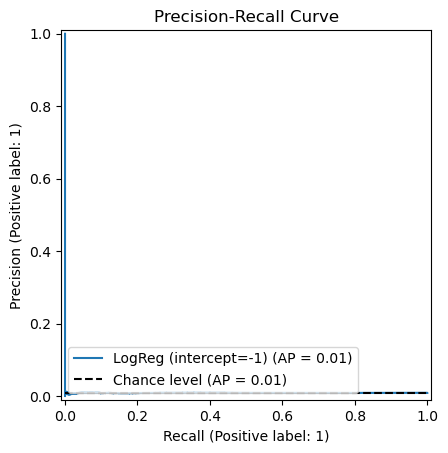

/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Learned Coefficients: [16.06516239 -8.77548666]
Effective Intercept: -12.04887179063704
Training Accuracy: 99%
Testing Accuracy: 99%
F-1 Score: 0.9865203415369161
Training log_loss: 0.17014138798204614
Testing log_loss: 0.14821964349391822
Precision Score: 0.9820810000000001
Recall Score: 0.991


/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Learned Coefficients: [ 7.59401079 16.18963273]
Effective Intercept: -3.7970053965784003
Training Accuracy: 24%
Testing Accuracy: 24%
F-1 Score: 0.37682657797531977
Training log_loss: 4.793811995005655
Testing log_loss: 4.78048922653431
Precision Score: 0.9824806272744864
Recall Score: 0.23996


/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Learned Coefficients: [ 1.80765619 -3.02276148]
Effective Intercept: -0.4519140476812598
Training Accuracy: 99%
Testing Accuracy: 99%
F-1 Score: 0.9865203415369161
Training log_loss: 0.19459881737413026
Testing log_loss: 0.19184923797220835
Precision Score: 0.9820810000000001
Recall Score: 0.991
Learned Coefficients: [0.         2.89822805]
Effective Intercept: 0.0
Training Accuracy: 1%
Testing Accuracy: 1%
F-1 Score: 0.00016055500495540137
Training log_loss: 1.6981930090556496
Testing log_loss: 1.6973756080962072
Precision Score: 8.099999999999999e-05
Recall Score: 0.009


/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Learned Coefficients: [-1.80765619 -3.02276148]
Effective Intercept: -0.4519140476812598
Training Accuracy: 99%
Testing Accuracy: 99%
F-1 Score: 0.9865203415369161
Training log_loss: 0.19459881737413026
Testing log_loss: 0.19184923797220835
Precision Score: 0.9820810000000001
Recall Score: 0.991


/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Learned Coefficients: [-7.59401079 16.18963273]
Effective Intercept: -3.7970053965784003
Training Accuracy: 24%
Testing Accuracy: 24%
F-1 Score: 0.37682657797531977
Training log_loss: 4.793811995005655
Testing log_loss: 4.78048922653431
Precision Score: 0.9824806272744864
Recall Score: 0.23996


/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Learned Coefficients: [-16.06516239  -8.77548666]
Effective Intercept: -12.04887179063704
Training Accuracy: 99%
Testing Accuracy: 99%
F-1 Score: 0.9865203415369161
Training log_loss: 0.17014138798204614
Testing log_loss: 0.14821964349391822
Precision Score: 0.9820810000000001
Recall Score: 0.991


/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Learned Coefficients: [ 0.08940966 -3.22884177]
Effective Intercept: 0.08940965925042667
Training Accuracy: 96%
Testing Accuracy: 96%
F-1 Score: 0.9728717912278233
Training log_loss: 0.27758239940920665
Testing log_loss: 0.2753589023161846
Precision Score: 0.9819927105876461
Recall Score: 0.96396
Learned Coefficients: [-0.08940966 -3.22884177]
Effective Intercept: 0.08940965925042667
Training Accuracy: 96%
Testing Accuracy: 96%
F-1 Score: 0.9728717912278233
Training log_loss: 0.27758239940920665
Testing log_loss: 0.2753589023161846
Precision Score: 0.9819927105876461
Recall Score: 0.96396


/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Figure size 800x600 with 0 Axes>

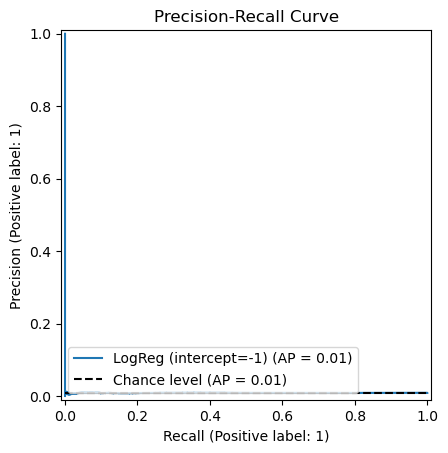

/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Learned Coefficients: [16.06516239 -8.77548666]
Effective Intercept: -12.04887179063704
Training Accuracy: 99%
Testing Accuracy: 99%
F-1 Score: 0.9865203415369161
Training log_loss: 0.17014138798204614
Testing log_loss: 0.14821964349391822
Precision Score: 0.9820810000000001
Recall Score: 0.991


/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Learned Coefficients: [ 7.59401079 16.18963273]
Effective Intercept: -3.7970053965784003
Training Accuracy: 24%
Testing Accuracy: 24%
F-1 Score: 0.37682657797531977
Training log_loss: 4.793811995005655
Testing log_loss: 4.78048922653431
Precision Score: 0.9824806272744864
Recall Score: 0.23996


/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Learned Coefficients: [ 1.80765619 -3.02276148]
Effective Intercept: -0.4519140476812598
Training Accuracy: 99%
Testing Accuracy: 99%
F-1 Score: 0.9865203415369161
Training log_loss: 0.19459881737413026
Testing log_loss: 0.19184923797220835
Precision Score: 0.9820810000000001
Recall Score: 0.991
Learned Coefficients: [0.         2.89822805]
Effective Intercept: 0.0
Training Accuracy: 1%
Testing Accuracy: 1%
F-1 Score: 0.00016055500495540137
Training log_loss: 1.6981930090556496
Testing log_loss: 1.6973756080962072
Precision Score: 8.099999999999999e-05
Recall Score: 0.009


/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Learned Coefficients: [-1.80765619 -3.02276148]
Effective Intercept: -0.4519140476812598
Training Accuracy: 99%
Testing Accuracy: 99%
F-1 Score: 0.9865203415369161
Training log_loss: 0.19459881737413026
Testing log_loss: 0.19184923797220835
Precision Score: 0.9820810000000001
Recall Score: 0.991


/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Learned Coefficients: [-7.59401079 16.18963273]
Effective Intercept: -3.7970053965784003
Training Accuracy: 24%
Testing Accuracy: 24%
F-1 Score: 0.37682657797531977
Training log_loss: 4.793811995005655
Testing log_loss: 4.78048922653431
Precision Score: 0.9824806272744864
Recall Score: 0.23996


/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Learned Coefficients: [-16.06516239  -8.77548666]
Effective Intercept: -12.04887179063704
Training Accuracy: 99%
Testing Accuracy: 99%
F-1 Score: 0.9865203415369161
Training log_loss: 0.17014138798204614
Testing log_loss: 0.14821964349391822
Precision Score: 0.9820810000000001
Recall Score: 0.991
Learned Coefficients: [ 0.08940966 -3.22884177]
Effective Intercept: 0.08940965925042667
Training Accuracy: 96%
Testing Accuracy: 96%
F-1 Score: 0.9728717912278233
Training log_loss: 0.27758239940920665
Testing log_loss: 0.2753589023161846
Precision Score: 0.9819927105876461
Recall Score: 0.96396


/opt/miniconda3/envs/ml_environment/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [17]:
intercept_values = [-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]
model_assessment(X_train=X_train,y_train=y_train, X_test=X_test, y_test=y_test, intercept_values=intercept_values)
results = model_assessment(X_train=X_train,y_train=y_train, X_test=X_test, y_test=y_test, intercept_values=intercept_values)

In [18]:
print("Class distribution:")
print(f"Class 0: {(y_train == 0).sum()} ({(y_train == 0).mean():.1%})")
print(f"Class 1: {(y_train == 1).sum()} ({(y_train == 1).mean():.1%})")

Class distribution:
Class 0: 74225 (99.0%)
Class 1: 775 (1.0%)


In [19]:
def analyze_imbalanced_results(results):
    for result in results:
        intercept_val = result['intercept_value']
        model = result['model']
        X_test = result['X_test_transformed']
        
        print(f"\n{'='*50}")
        print(f"Intercept: {intercept_val}")
        print(f"{'='*50}")
        
        y_pred = model.predict(X_test)
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(f"                 Predicted")
        print(f"Actual    Legit  Fraud")
        print(f"Legit     {cm[0,0]:5d}  {cm[0,1]:5d}")
        print(f"Fraud     {cm[1,0]:5d}  {cm[1,1]:5d}")
        
        # Key metrics for imbalanced data
        tn, fp, fn, tp = cm.ravel()
        
        print(f"\nKey Metrics:")
        print(f"True Positives (Fraud caught): {tp}")
        print(f"False Positives (False alarms): {fp}")
        print(f"True Negatives (Legit correctly): {tn}")
        print(f"False Negatives (Fraud missed): {fn}")
        
        # More meaningful metrics
        fraud_recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        fraud_precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        
        print(f"Fraud Detection Rate (Recall): {fraud_recall:.3f}")
        print(f"Fraud Precision: {fraud_precision:.3f}")
        print(f"False Positive Rate: {fp/74225:.4f}")

# Run this analysis
analyze_imbalanced_results(results)


Intercept: -1
Confusion Matrix:
                 Predicted
Actual    Legit  Fraud
Legit     24096    679
Fraud       222      3

Key Metrics:
True Positives (Fraud caught): 3
False Positives (False alarms): 679
True Negatives (Legit correctly): 24096
False Negatives (Fraud missed): 222
Fraud Detection Rate (Recall): 0.013
Fraud Precision: 0.004
False Positive Rate: 0.0091

Intercept: -0.75
Confusion Matrix:
                 Predicted
Actual    Legit  Fraud
Legit     24775      0
Fraud       225      0

Key Metrics:
True Positives (Fraud caught): 0
False Positives (False alarms): 0
True Negatives (Legit correctly): 24775
False Negatives (Fraud missed): 225
Fraud Detection Rate (Recall): 0.000
Fraud Precision: 0.000
False Positive Rate: 0.0000

Intercept: -0.5
Confusion Matrix:
                 Predicted
Actual    Legit  Fraud
Legit      5825  18950
Fraud        51    174

Key Metrics:
True Positives (Fraud caught): 174
False Positives (False alarms): 18950
True Negatives (Legit correct

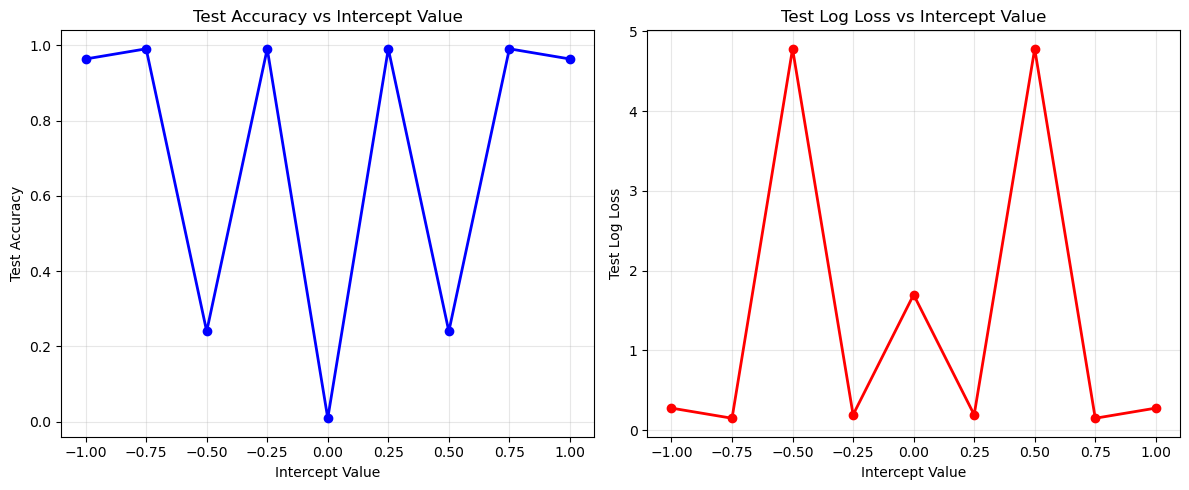


Best Accuracy: 0.9910 at intercept = -0.75
Best Log Loss: 0.1482 at intercept = -0.75


In [20]:
plot_intercept_experiment_results(results)